# Project 3: Employee Salary Prediction

# Introduction:

*   In this project, you will predict employee salaries (AnnualSalary) based on various professional experience, education, and performance features.
*   You will conduct data exploration, preprocessing, and train machine learning models to predict employee compensation.
*   Finally, you'll evaluate the models using regression metrics.

**Datasets Locations and Names:** Canvas -> Modules -> Week 10 -> Dataset -> "employee_salary.csv".

Please save your Google Colab project as FirstName_LastName_Project3.ipynb and submit (upload) your source code to Canvas.

# **Practical Tip (for Colab users without GPU/with limited resources):**
If runtime is too slow, you may use random sampling to work with a smaller subset of the dataset (e.g., 30k–50k rows) for EDA, training, evaluation, and GridSearchCV.
Once you have selected your best model and hyperparameters, retrain and evaluate your final model on the full dataset and report those results in your conclusion.

# Dataset Description:

* **YearsExperience:** Total years of professional work experience.
* **EducationLevel:** Highest level of education completed (High School, Bachelor's, Master's, PhD).
* **JobTitle:** Current job position (Junior, Mid-Level, Senior, Lead, Manager).
* **Department:** Department where the employee works (IT, Sales, Marketing, HR, Finance, Operations).
* **PerformanceScore:** Annual performance rating (1-5 scale, where 5 is excellent).
* **ProjectsCompleted:** Number of projects completed in the last year.
* **OvertimeHours:** Average overtime hours per month.
* **TrainingHours:** Hours of professional training completed in the last year.
* **Certifications:** Number of professional certifications held.
* **TeamSize:** Number of people in the employee's immediate team.
* **RemoteWork:** Work arrangement (Fully Remote, Hybrid, On-site).
* **CompanyTenure:** Number of years with the current company.
* **Age:** Age of the employee.
* **AnnualSalary:** The target variable, representing the employee's annual salary in dollars.

# Task 1: Exploratory Data Analysis (EDA)
* Visualize the distribution of the target variable (`AnnualSalary`).
* Create scatter plots or histograms to explore relationships between features and the target.
* Check for missing values.
* Identify and visualize potential outliers in the target variable.
* Explore salary distributions across different categories (JobTitle, Department, EducationLevel).

In [ ]:
# Your EDA code here


##############COPIED LIBRARIES FROM PROJECT 2 to save time on typing them all
##different libraries that might or might not be used, just putting all the ones we
### have learned just in case

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd


from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedShuffleSplit, KFold

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

from sklearn.impute import SimpleImputer

from sklearn.svm import SVR


from google.colab import drive
drive.mount('/content/drive')

salary = pd.read_csv("drive/My Drive/Machine_Learning/employee_salary.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##To check if it works
#Basic info about the data

print ("Employee Salary info: \n")
print (f"Number of rows in 'employee_salary': {len(salary)}")
salary.info()

Employee Salary info: 

Number of rows in 'employee_salary': 80000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YearsExperience    80000 non-null  float64
 1   EducationLevel     80000 non-null  object 
 2   JobTitle           80000 non-null  object 
 3   Department         80000 non-null  object 
 4   PerformanceScore   73600 non-null  float64
 5   ProjectsCompleted  80000 non-null  int64  
 6   OvertimeHours      80000 non-null  float64
 7   TrainingHours      75200 non-null  float64
 8   Certifications     76000 non-null  float64
 9   TeamSize           80000 non-null  int64  
 10  RemoteWork         74400 non-null  object 
 11  CompanyTenure      80000 non-null  float64
 12  Age                80000 non-null  int64  
 13  AnnualSalary       80000 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 8.

In [ ]:
##Sample table to see if data was uploaded properly

print ("Employee Salary info: \n")
salary.head(500)


Employee Salary info: 



,YearsExperience,EducationLevel,JobTitle,Department,PerformanceScore,ProjectsCompleted,OvertimeHours,TrainingHours,Certifications,TeamSize,RemoteWork,CompanyTenure,Age,AnnualSalary
0,9.4,High School,Senior,Finance,3.0,10,9.6,104.0,2.0,15,Hybrid,2.2,28,167900
1,6.8,High School,Senior,IT,3.0,10,8.0,27.0,4.0,10,On-site,0.8,24,164700
2,6.5,Bachelor's,Senior,IT,3.0,7,12.8,41.0,2.0,7,NaN,0.2,33,168000
3,6.5,Master's,Senior,IT,3.0,10,13.3,29.0,1.0,15,Hybrid,1.8,29,213600
4,15.2,Master's,Junior,Operations,5.0,9,58.4,NaN,3.0,5,Fully Remote,9.5,39,137100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,15.0,Bachelor's,Junior,Marketing,NaN,11,7.0,58.0,1.0,7,Hybrid,0.9,37,88000
496,16.6,Master's,Lead,Finance,1.0,9,6.3,28.0,1.0,3,Hybrid,0.1,40,249900
497,5.2,PhD,Junior,IT,NaN,8,18.9,25.0,4.0,5,Fully Remote,4.5,28,152400
498,5.9,Master's,Mid-Level,IT,3.0,9,5.2,20.0,1.0,10,On-site,3.9,27,150400


<function matplotlib.pyplot.show(close=None, block=None)>

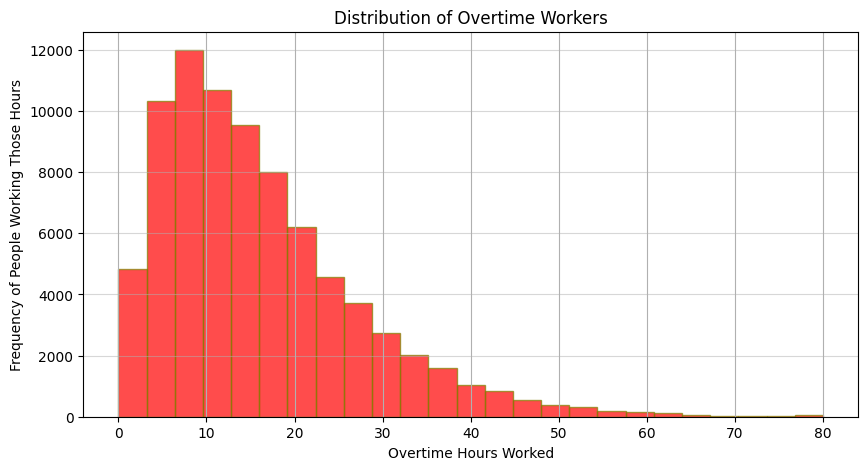

In [ ]:
###to "explore relationships between the featues", we will use the following histogram:

plt.figure (figsize=(10,5))
salary ['OvertimeHours'].hist(bins = 25, edgecolor = 'olive', alpha = 0.7, color =['red'])

plt.title ('Distribution of Overtime Workers')
plt.xlabel('Overtime Hours Worked')
plt.ylabel ('Frequency of People Working Those Hours')
plt.grid (axis='y', alpha =0.5)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

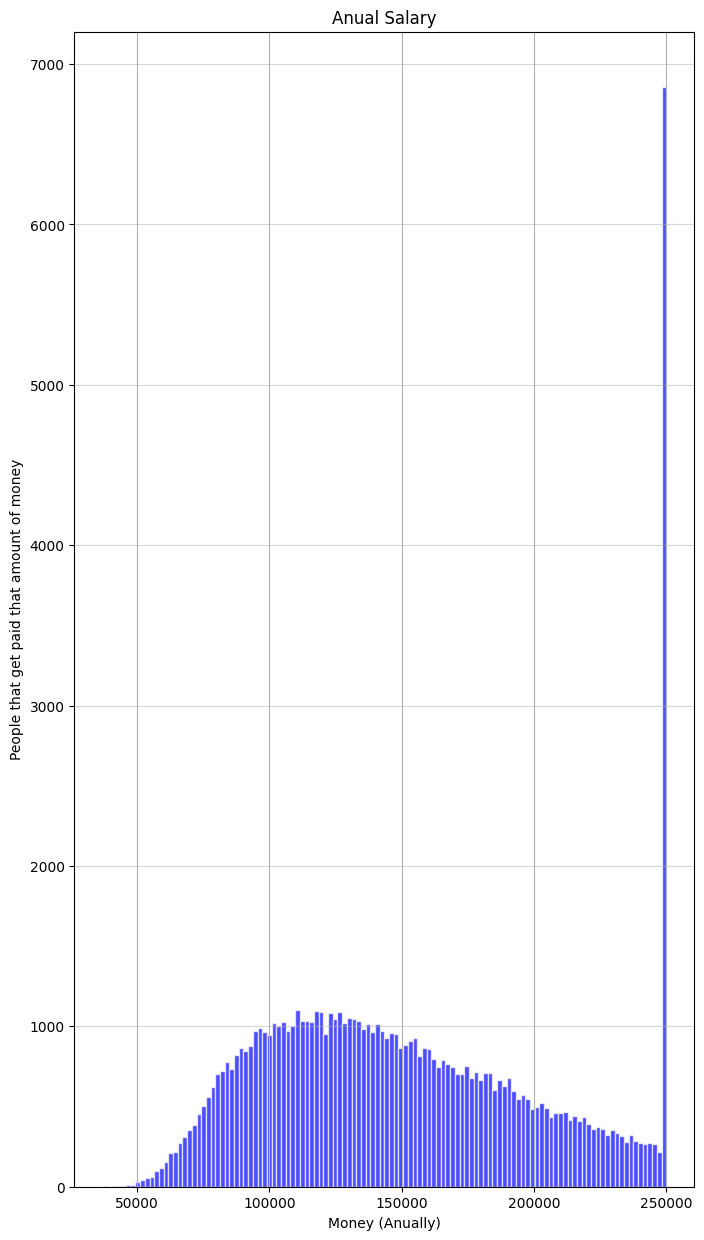

In [ ]:
##Visualize the target variable "AnnualSalary" by utilizing a bar
###In this case, how many of the customers are exiting or not



##tried different things to see which one would be best, in this case, a bar graph was best to respresent the different salaries.
''''
plt.figure (figsize=(10,10))

plt.scatter(salary['AnnualSalary'], salary['JobTitle'])
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot of X vs Y')
plt.grid(True) # Optional: Add gridlines
plt.show()


plt.figure (figsize =(8,5))
salary.boxplot(column = 'AnnualSalary', by = 'JobTitle', grid = True)
plt.title ('Different salary per job tittle')



plt.suptitle('')
plt.xlabel('Job title')
plt.ylabel ('Salary')
plt.show
'''''

plt.figure (figsize=(8,15))

salary ['AnnualSalary'].hist(bins = 120, edgecolor = 'white', alpha = 0.7, color =['blue'])

plt.title ('Anual Salary')


plt.xlabel('Money (Anually)')

plt.ylabel ('People that get paid that amount of money')

plt.grid (axis='y', alpha =0.5)


plt.show

In [ ]:
## Check for any missing values within employee salary csv file


print ("Missing values are the following: " )

missing_values = salary.isnull().sum()


print (missing_values[missing_values >0])


Missing values are the following: 
PerformanceScore    6400
TrainingHours       4800
Certifications      4000
RemoteWork          5600
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x500 with 0 Axes>

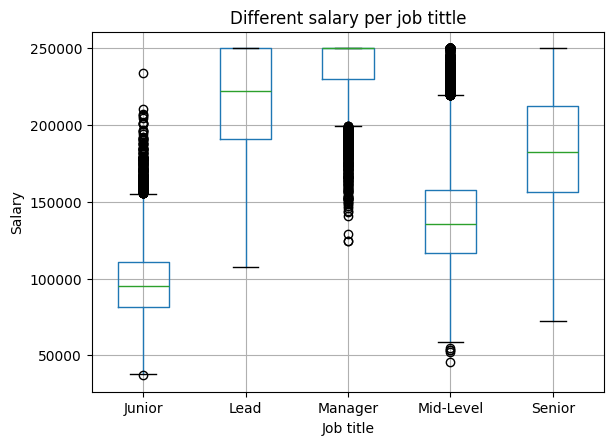

<Figure size 800x500 with 0 Axes>

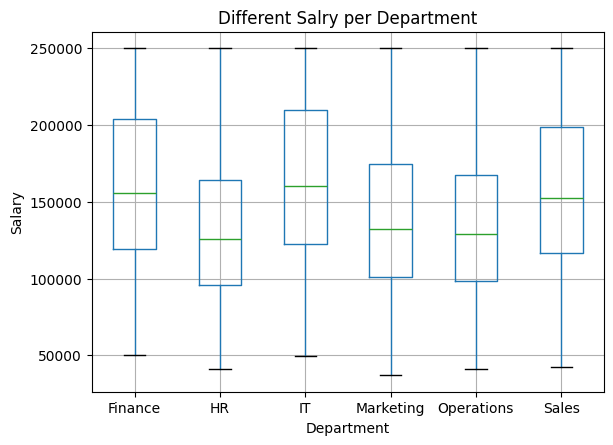

<Figure size 800x500 with 0 Axes>

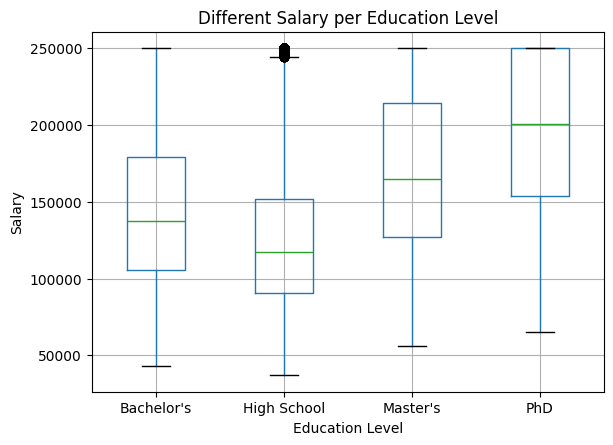

In [ ]:
##Will add box plot to process any outliers from the target variable

#relationship between AnnualSalary and JobTitle

plt.figure (figsize =(8,5))
salary.boxplot(column = 'AnnualSalary', by = 'JobTitle', grid = True)
plt.title ('Different salary per job tittle')

plt.suptitle('')
plt.xlabel('Job title')
plt.ylabel ('Salary')
plt.show


## There are some outliers in Junior, Manager, and Mid-Level, meaning some people are getting paid more, or less, than the average.



#relationship between AnnualSalary and Department

plt.figure (figsize =(8,5))
salary.boxplot(column = 'AnnualSalary', by = 'Department', grid = True)
plt.title ('Different Salry per Department')

plt.suptitle('')
plt.xlabel('Department')
plt.ylabel ('Salary')
plt.show



#relationship between AnnualSalary and Department

plt.figure (figsize =(8,5))
salary.boxplot(column = 'AnnualSalary', by = 'EducationLevel', grid = True)
plt.title ('Different Salary per Education Level')

plt.suptitle('')
plt.xlabel('Education Level')
plt.ylabel ('Salary')
plt.show



##There are some outliers in the high school education level, so that means that high school graduates can still get paid a lot.


# Task 2: Data Preprocessing with Pipelines and Feature Engineering
* Use Pipeline for handling missing values, scaling, and feature engineering.
* Use ColumnTransformer for applying different transformations to numeric and categorical features.
* Consider creating new features (e.g., experience-to-age ratio, projects per year rate).

In [ ]:
print ("Employee Salary info: \n")
salary.head(500)

Employee Salary info: 



,YearsExperience,EducationLevel,JobTitle,Department,PerformanceScore,ProjectsCompleted,OvertimeHours,TrainingHours,Certifications,TeamSize,RemoteWork,CompanyTenure,Age,AnnualSalary
0,9.4,High School,Senior,Finance,3.0,10,9.6,104.0,2.0,15,Hybrid,2.2,28,167900
1,6.8,High School,Senior,IT,3.0,10,8.0,27.0,4.0,10,On-site,0.8,24,164700
2,6.5,Bachelor's,Senior,IT,3.0,7,12.8,41.0,2.0,7,NaN,0.2,33,168000
3,6.5,Master's,Senior,IT,3.0,10,13.3,29.0,1.0,15,Hybrid,1.8,29,213600
4,15.2,Master's,Junior,Operations,5.0,9,58.4,NaN,3.0,5,Fully Remote,9.5,39,137100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,15.0,Bachelor's,Junior,Marketing,NaN,11,7.0,58.0,1.0,7,Hybrid,0.9,37,88000
496,16.6,Master's,Lead,Finance,1.0,9,6.3,28.0,1.0,3,Hybrid,0.1,40,249900
497,5.2,PhD,Junior,IT,NaN,8,18.9,25.0,4.0,5,Fully Remote,4.5,28,152400
498,5.9,Master's,Mid-Level,IT,3.0,9,5.2,20.0,1.0,10,On-site,3.9,27,150400


In [ ]:
# Your data preprocessing code here

##divide the data: numbers vs categorical entities

numer_values = ['YearsExperience','PerformanceScore','ProjectsCompleted','OvertimeHours','TrainingHours','Certifications','TeamSize','CompanyTenure','Age']
categorical_values = ['EducationLevel','JobTitle' , 'Department','RemoteWork']

## transformers


number_trans = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())
])


#### 'ignore' is for bug fix,
##seems to help the pipeline not fail when a new entity appears during testing

categorical_trans = Pipeline(steps=[('imputer', SimpleImputer(strategy = 'most_frequent')),
 ('onehot', OneHotEncoder(handle_unknown='ignore'))])


## a column only for transformations
###this to make transformations available for different columns

preprocessor = ColumnTransformer(transformers= [('number', number_trans, numer_values),
 ('categorical', categorical_trans, categorical_values)], remainder= 'passthrough')


###splitting the data so there is a test and train set

X = salary.drop ('AnnualSalary', axis=1)
Y = salary['AnnualSalary']

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split( X, Y, test_size=0.2, random_state = 42)



print (f"Shape of X_TRAIN: \n{X_TRAIN.shape}\n")


print (f"Shape of X_TEST: \n{X_TEST.shape}")

Shape of X_TRAIN: 
(64000, 13)

Shape of X_TEST: 
(16000, 13)


In [ ]:
##Experiment with new features

#going to create the experience to age ratio variable

X_TRAIN['ExpirienceTOage'] = X_TRAIN['YearsExperience'] /  X_TRAIN['Age']

X_TEST['ExpirienceTOage'] = X_TEST['YearsExperience'] /  X_TEST['Age']



print (f"Shape of X_TRAIN with ExpirienceTOage included: \n{X_TRAIN.shape}\n")


print (f"Shape of X_TEST with ExpirienceTOage included: \n{X_TEST.shape}")


Shape of X_TRAIN with ExpirienceTOage included: 
(64000, 14)

Shape of X_TEST with ExpirienceTOage included: 
(16000, 14)


In [ ]:
##More detailed view of x_train with added feature

print (f"Detailed view of X_TRAIN with ExpirienceTOage included: \n{X_TRAIN}\n")

##more detailed view of x_test with added feature

print (f"Detailed view of X_TEST with ExpirienceTOage included: \n{X_TEST}")


Detailed view of X_TRAIN with ExpirienceTOage included: 
       YearsExperience EducationLevel   JobTitle Department  PerformanceScore  \
3822               5.3     Bachelor's     Senior         IT               3.0   
35562              6.6     Bachelor's    Manager      Sales               4.0   
4883              10.1    High School  Mid-Level         HR               3.0   
71170              4.6            PhD     Junior    Finance               2.0   
25665              3.3       Master's     Junior  Marketing               3.0   
...                ...            ...        ...        ...               ...   
6265              10.7     Bachelor's  Mid-Level      Sales               4.0   
54886              2.5    High School     Senior         IT               3.0   
76820             15.2            PhD     Senior         IT               1.0   
860                3.8     Bachelor's     Junior         HR               5.0   
15795              6.9       Master's       Lead    

# Task 3: Train Regression Models
Train the following 5 regression models within a pipeline:
* Linear Regression
* Ridge Regression
* Lasso Regression
* Decision Tree Regressor
* Support Vector Regressor


In [ ]:
# Your model training code here

##Stratified sample (only the first 1k rows)
##bug fix so I could do task 3
strat = 1000

X_strat = X.head(strat).copy()
Y_strat = Y.head(strat).copy()

print (f"Original X shape: {X.shape}")
print (f"Stratified shape of X: {X_strat.shape}")

print ("\n\nStratified target distribution: \n")
print (Y_strat.value_counts(normalize = True))




Original X shape: (80000, 13)
Stratified shape of X: (1000, 13)


Stratified target distribution: 

AnnualSalary
250000    0.070
139100    0.005
136600    0.005
153600    0.004
194100    0.004
          ...  
100800    0.001
226600    0.001
126800    0.001
213600    0.001
164700    0.001
Name: proportion, Length: 706, dtype: float64


In [ ]:


##copied the body from my project 2 and appropiated it to project 3


Task3_num_trans = Pipeline(steps=[('imputer', SimpleImputer(strategy = 'median')), ('scalers', StandardScaler()) ])

Task3_categorical_trans = Pipeline(steps =[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer ( transformers = [ ('num', Task3_num_trans, numer_values), ('cat', Task3_categorical_trans, categorical_values)])

##to be able to run the program faster and debug, smaller, stratified data is used.

X_TRAIN_strat, X_TEST_strat, Y_TRAIN_strat, Y_TEST_strat = train_test_split (X_strat, Y_strat, test_size = 0.2, random_state= 42)

#notify the user how the stratified data is being divided

print(f"Stratified training data size:\n {X_TRAIN_strat.shape[0]}\n\n")
print(f"Stratified test data size: \n {X_TEST_strat.shape[0]}\n")

## the 5 different models within a pipline:

#training the differnet models asked for in the task 3 directions

models = {

          ##Linear Regression
    "Linear Regression": LinearRegression(),

          ##Ridge Regression
    "Ridge Regression": Ridge(random_state= 42),


##Lasso Regression
    "Lasso Regression": Lasso(random_state=42),

          ##Decision Tree Regressor
    "Decision Tree Regressor": DecisionTreeRegressor(random_state = 42),


##Support Vector Regressor
    "Support Vector Regressor": SVC()

}

pipelines = {}
for differentNames, model in models.items():
    # Full pipeline: Preprocessing -> Model
    pipelines[differentNames] = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    pipelines [differentNames].fit(X_TRAIN_strat, Y_TRAIN_strat)
    print (f"{differentNames} model trained")





Stratified training data size:
 800


Stratified test data size: 
 200

Linear Regression model trained
Ridge Regression model trained
Lasso Regression model trained
Decision Tree Regressor model trained


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.208e+09, tolerance: 2.055e+08
  model = cd_fast.enet_coordinate_descent(


Support Vector Regressor model trained


# Task 4: Model Evaluation
* Evaluate your models using k-fold cross-validation (at least 5 folds) to assess how well the models generalize.
* Calculate and report the average R² score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) from the cross-validation.
* Compare and discuss models based on their cross-validated performance.


In [ ]:
# Your model evaluation code here

scoring = {


          ##"Calculate and report the average R² score, Mean Absolute Error (MAE),
          #Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) from the cross-validation."
          ##Root Mean Squared Error will be calculated from MSE

           'R2': make_scorer(r2_score),
           'MAE': make_scorer (mean_absolute_error),
           'MSE': make_scorer(mean_squared_error),

}


##Evaluate your models using k-fold cross-validation
  #(at least 5 folds) to assess how well the models generalize.


## "n_splits" refers to the numbers of splits, folds, that the kfold is doing

CrossValidation = KFold (n_splits =5, shuffle = True, random_state =42)

answers = {}

##cross validate the different models
for models, pipe in pipelines.items():
  ##process the different models

  print (f"{models} being evaluated.\n")
  CrossValidation_results = cross_validate (
      pipe,
      X_TRAIN_strat[Y_TRAIN_strat.notnull()],
      Y_TRAIN_strat[Y_TRAIN_strat.notnull()],
      cv = CrossValidation,
      scoring = scoring,
      return_train_score = False,
      n_jobs = -1
  )




  ##"Calculate and report the average R² score, Mean Absolute Error (MAE),
          #Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) from the cross-validation."
          ##Root Mean Squared Error will be calculated from MSE

  Results = {

             'Average R^2': CrossValidation_results['test_R2'].mean(),
             'Average MAE': CrossValidation_results['test_MAE'].mean(),
             'Avg MSE': CrossValidation_results['test_MSE'].mean(),
             'Avg RMSE': np.sqrt(CrossValidation_results['test_MSE'].mean())

  }



  answers [models] = Results

  print (f"Evaluation of {models} succesful!\n\n")


finalResults = pd.DataFrame(answers).T


##Compare and discuss models based on their cross-validated performance.


print("\nCroos Validation (CV) performace summary to compare and contrast: \n")


print (finalResults.sort_values(by='Average R^2', ascending= False))



##the value that is closest to 1 is the best model: so:

##print the different values
bestMODEL = finalResults['Average R^2']

print (f"\n\n\n\n\n{bestMODEL}" )

##print what model is the best

bestMODELname = finalResults['Average R^2'].idxmax()

print (f"\n\nThe best model is: {bestMODELname}" )





Linear Regression being evaluated.

Evaluation of Linear Regression succesful!


Ridge Regression being evaluated.

Evaluation of Ridge Regression succesful!


Lasso Regression being evaluated.

Evaluation of Lasso Regression succesful!


Decision Tree Regressor being evaluated.

Evaluation of Decision Tree Regressor succesful!


Support Vector Regressor being evaluated.

Evaluation of Support Vector Regressor succesful!



Croos Validation (CV) performace summary to compare and contrast: 

                          Average R^2   Average MAE       Avg MSE  \
Lasso Regression             0.959550   7773.349815  1.033973e+08   
Linear Regression            0.959549   7772.325780  1.033988e+08   
Ridge Regression             0.959466   7839.352668  1.036179e+08   
Decision Tree Regressor      0.708855  20913.875000  7.405293e+08   
Support Vector Regressor    -3.738177  97387.500000  1.205315e+10   

                               Avg RMSE  
Lasso Regression           10168.446971  
Linea

# Task 5: Hyperparameter Tuning with GridSearchCV
* Apply GridSearchCV to your best model for hyperparameter tuning.
* Test different hyperparameters relevant to your chosen model.
* Report the best parameters and the improved performance metrics.

In [ ]:
# Your GridSearchCV code here

##single out the best model
best_pipe = pipelines [bestMODELname]



##use classifer for lasso

grid1 = {

         'classifier__alpha': np.logspace(-4, 1, 20)

}


##perform grid search

grid1_search = GridSearchCV(

    estimator = best_pipe,
    param_grid = grid1,
    cv = 5,
    scoring= 'neg_mean_squared_error',
    verbose = 1,
    n_jobs=-1

)

##fit the data and tell the user a summary


grid1_search.fit(X_TRAIN_strat, Y_TRAIN_strat)

print (f"\nThe best parameters are: {grid1_search.best_params_}")

print (f"\nThe best cross-validated MSE: {grid1_search.best_score_}\n\n")




##used to represent best fit
LASSO = grid1_search.best_estimator_

y_predict_lasso = LASSO.predict(X_TEST_strat)


## check and calculate other values of the best model

r2_bestSCORE = r2_score(Y_TEST_strat, y_predict_lasso)

maeBEST = np.abs(Y_TEST_strat - y_predict_lasso).mean()
rmseBEST = np.sqrt(mean_squared_error(Y_TEST_strat, y_predict_lasso))

print (f"\nR^2 on Lasso: {r2_bestSCORE}")
print (f"\nMAE on Lasso: {maeBEST}")
print (f"\nR^2 on Lasso: {rmseBEST}")





Fitting 5 folds for each of 20 candidates, totalling 100 fits

The best parameters are: {'classifier__alpha': np.float64(0.0001)}

The best cross-validated MSE: -105244176.01369587



R^2 on Lasso: 0.9628407202419431

MAE on Lasso: 8082.491795506889

R^2 on Lasso: 10449.478663124539


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.109e+09, tolerance: 2.055e+08
  model = cd_fast.enet_coordinate_descent(


# Task 6: Feature Importance Analysis
* For Decision Tree model, analyze and visualize feature importance.
(In scikit-learn, DecisionTreeRegressor automatically compute feature importance after training)
* Discuss which features are most influential in predicting employee salaries.


                  Original_Feature  Importance
0             cat__JobTitle_Junior    0.320946
1          cat__JobTitle_Mid-Level    0.235719
2          cat__EducationLevel_PhD    0.075144
3                  YearsExperience    0.065602
4     cat__EducationLevel_Master's    0.062564
5             cat__JobTitle_Senior    0.049003
6                 PerformanceScore    0.029503
7                   Certifications    0.023160
8                              Age    0.023041
9                    CompanyTenure    0.017742
10              cat__Department_IT    0.012553
11                   OvertimeHours    0.012431
12               ProjectsCompleted    0.011107
13           cat__JobTitle_Manager    0.009515
14  cat__EducationLevel_Bachelor's    0.009238


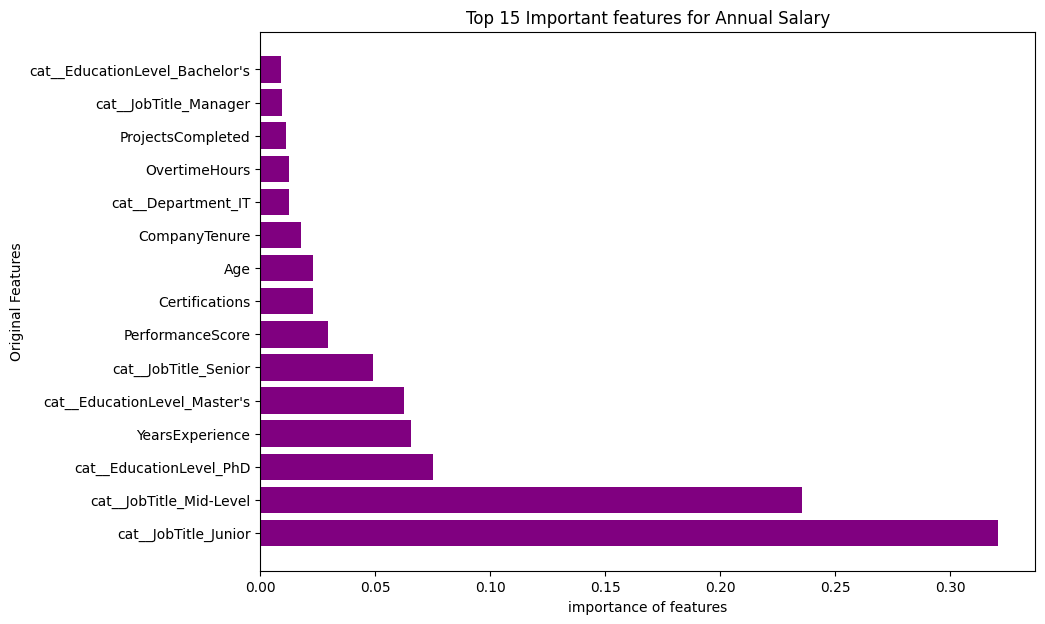



The importance of different features provides details about the Annual Salary, all from the Decision Tree Regressor


In [ ]:
# Your feature importance analysis code here

DecisionTree_pipe = pipelines['Decision Tree Regressor']
DecisionTree_model = DecisionTree_pipe.named_steps['classifier']


##bug fix, do this in order to check if the classifier is in the decision tree regressor

if not isinstance (DecisionTree_model, DecisionTreeRegressor):
  print ("Classifier not found in pipeline of Decision Tree")

else:

  preprocessor = DecisionTree_pipe.named_steps['preprocessor']


  numeric_features_out = numer_values




  try:
    feature_names_out = preprocessor.get_feature_names_out()

  except AttributeError:

    print ("Couldn't get 'feature names'")


    feature_names_out = [f'Feature_{i}' for i in range(DecisionTree_model.n_features_)]

  Highlight = DecisionTree_model.feature_importances_


  feature_highlight_DecisionTree = pd.DataFrame ({

          'Feature': feature_names_out,
          'Importance': Highlight






  })



##For Decision Tree model, analyze and visualize feature importance. (
    ##In scikit-learn, DecisionTreeRegressor automatically compute feature importance after training)


  feature_highlight_DecisionTree =  feature_highlight_DecisionTree.sort_values(by = 'Importance', ascending = False)


  def get_original_feature_name(OriginalName):

    for CategoricalFeature in categorical_values:
      if CategoricalFeature in OriginalName:
        return OriginalName

    return OriginalName.split ('__')[-1]

  feature_highlight_DecisionTree['Original_Feature'] = feature_highlight_DecisionTree['Feature'].apply(get_original_feature_name)


  aggregated_highlight = feature_highlight_DecisionTree.groupby ('Original_Feature')['Importance'].sum().sort_values(ascending = False).reset_index()

##print the top 15 most important features
  top15 = aggregated_highlight.head(15)

  print(top15)


  ##print a plot that contrasts the highlight and the features.

plt.figure (figsize = (10,7))


plt.barh(top15['Original_Feature'], top15['Importance'], color = 'purple')


plt.xlabel('importance of features')
plt.ylabel('Original Features')

plt.title ('Top 15 Important features for Annual Salary')



plt.show()



##Discuss which features are most influential in predicting employee salaries.
print ("\n\nThe importance of different features provides details about the Annual Salary, all from the Decision Tree Regressor")









# Conclusion:
* Summarize your findings and explain any interesting insights from your analysis.




# From part 1 and 6, it is found that the amount of impportance of salary remains in the title of your job mostly, and it doesn't depend as much of the other criteria.


##Lasso regression was the most efficient model, found in part 4, and that is why it is used in part 5.

##In part 3 I had to (like in project 2) stratify the data up because my computer could not handle all the data at once.

##SINCE support vector machine took too long, i lowered it to 1000 rowsw - oct 29 10:01 PM